In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import Pool
from sklearn.preprocessing import LabelEncoder  # a-->0 b-->1 c--> 2
from sklearn.preprocessing import OneHotEncoder # bineray  4--->  000010
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor

##  Milestone 1: Data Collection, Exploration, and Preprocessing


In [7]:
path = "F:/project_data/"
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
stores = pd.read_csv(path + 'stores.csv')
oil = pd.read_csv(path + 'oil.csv')
holidays = pd.read_csv(path + 'holidays_events.csv')
transactions = pd.read_csv(path + 'transactions.csv')
pd.read_csv(path+'train.csv')
train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [3]:
train_copy = train.copy()
test_copy = test.copy()
stores_copy = stores.copy()
oil_copy = oil.copy()
holidays_copy = holidays.copy()
transactions_copy = transactions.copy()


In [4]:
# ---------------------------------------------
# Shape
# ---------------------------------------------
print("Train shape:", train_copy.shape)
print("Test shape:", test_copy.shape)
print("Oil shape:", oil_copy.shape)
print("Holidays shape:", holidays_copy.shape)
print("Stores shape:", stores_copy.shape)
print("Transactions shape:", transactions_copy.shape)


# ---------------------------------------------
# 🔹 ا(Missing values)
# ---------------------------------------------
print("\nMissing values per dataset:")
print("Train:\n", train_copy.isnull().sum())
print("\nOil:\n", oil_copy.isnull().sum())
print("\nHolidays:\n", holidays_copy.isnull().sum())
print("\nStores:\n", stores_copy.isnull().sum())
print("\nTransactions:\n", transactions_copy.isnull().sum())
print("\test:\n", test_copy.isnull().sum())

# ---------------------------------------------
# 🔹 duplicated rows
# ---------------------------------------------
print("\nDuplicated rows:")
print("Train duplicates:", train_copy.duplicated().sum())
print("Test duplicates:", test_copy.duplicated().sum())
print("Oil duplicates:", oil_copy.duplicated().sum())
print("Holidays duplicates:", holidays_copy.duplicated().sum())
print("Stores duplicates:", stores_copy.duplicated().sum())
print("Transactions duplicates:", transactions_copy.duplicated().sum())
print("test :", test_copy.duplicated().sum())

train_copy.info()


Train shape: (3000888, 6)
Test shape: (28512, 5)
Oil shape: (1218, 2)
Holidays shape: (350, 6)
Stores shape: (54, 5)
Transactions shape: (83488, 3)

Missing values per dataset:
Train:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Oil:
 date           0
dcoilwtico    43
dtype: int64

Holidays:
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Stores:
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Transactions:
 date            0
store_nbr       0
transactions    0
dtype: int64
	est:
 id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Duplicated rows:
Train duplicates: 0
Test duplicates: 0
Oil duplicates: 0
Holidays duplicates: 0
Stores duplicates: 0
Transactions duplicates: 0
test : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 300088

In [8]:
# ---------------------------------------------------------
#  datetime
# ---------------------------------------------------------


dfs = [train_copy, test_copy, oil_copy, holidays_copy, transactions_copy]

for df in dfs:
    df["date"] = pd.to_datetime(df["date"])



In [9]:


# Step 1: Interpolation (recommended in Kaggle notebooks)
oil_copy['dcoilwtico'] = oil_copy['dcoilwtico'].interpolate(method='linear')

# Step 2: Forward + Backward Fill 
oil_copy['dcoilwtico'] = oil_copy['dcoilwtico'].ffill().bfill()

print("✅   Missing Oil + FFill + BFill ")
print("Missing :", oil_copy['dcoilwtico'].isnull().sum())


✅   Missing Oil + FFill + BFill 
Missing : 0


In [8]:
dfs = [train_copy, test_copy, oil_copy, holidays_copy, transactions_copy]
names = ["train_copy", "test_copy", "oil_copy", "holidays_copy", "transactions_copy"]


for df, name in zip(dfs, names):
    print(f"===== {name} (head 10) =====")
    display(df.head(10))
    print("\n")

===== train_copy (head 10) =====


id       date  store_nbr        family  sales  onpromotion
0   0 2013-01-01          1    AUTOMOTIVE    0.0            0
1   1 2013-01-01          1     BABY CARE    0.0            0
2   2 2013-01-01          1        BEAUTY    0.0            0
3   3 2013-01-01          1     BEVERAGES    0.0            0
4   4 2013-01-01          1         BOOKS    0.0            0
5   5 2013-01-01          1  BREAD/BAKERY    0.0            0
6   6 2013-01-01          1   CELEBRATION    0.0            0
7   7 2013-01-01          1      CLEANING    0.0            0
8   8 2013-01-01          1         DAIRY    0.0            0
9   9 2013-01-01          1          DELI    0.0            0



===== test_copy (head 10) =====


id       date  store_nbr        family  onpromotion
0  3000888 2017-08-16          1    AUTOMOTIVE            0
1  3000889 2017-08-16          1     BABY CARE            0
2  3000890 2017-08-16          1        BEAUTY            2
3  3000891 2017-08-16          1     BEVERAGES           20
4  3000892 2017-08-16          1         BOOKS            0
5  3000893 2017-08-16          1  BREAD/BAKERY           12
6  3000894 2017-08-16          1   CELEBRATION            0
7  3000895 2017-08-16          1      CLEANING           25
8  3000896 2017-08-16          1         DAIRY           45
9  3000897 2017-08-16          1          DELI           18



===== oil_copy (head 10) =====


date  dcoilwtico
0 2013-01-01       93.14
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20
5 2013-01-08       93.21
6 2013-01-09       93.08
7 2013-01-10       93.81
8 2013-01-11       93.60
9 2013-01-14       94.27



===== holidays_copy (head 10) =====


date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   
5 2012-05-12  Holiday     Local        Puyo         Cantonizacion del Puyo   
6 2012-06-23  Holiday     Local    Guaranda      Cantonizacion de Guaranda   
7 2012-06-25  Holiday  Regional    Imbabura  Provincializacion de Imbabura   
8 2012-06-25  Holiday     Local   Latacunga     Cantonizacion de Latacunga   
9 2012-06-25  Holiday     Local     Machala           Fundacion de Machala   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
5        False  
6        False  
7        False  
8        False  
9        False



===== transactions_copy (head 10) =====


date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922
5 2013-01-02          5          1903
6 2013-01-02          6          2143
7 2013-01-02          7          1874
8 2013-01-02          8          3250
9 2013-01-02          9          2940

In [10]:

holidays_copy = holidays_copy[
    ~(holidays_copy['type'].isin(['Work Day'])) &
    ~(holidays_copy['transferred'] == True)
].copy()

# ---------------------------------------------------------
#   holidays:
#    National 
#    Regional 
#    Local    
# ---------------------------------------------------------

#  National Holidays
holidays_national = holidays_copy[holidays_copy['locale'] == 'National'].copy()
holidays_national['national_holiday'] = 1
holidays_national = holidays_national[['date', 'national_holiday']]

#  Regional Holidays
holidays_regional = holidays_copy[holidays_copy['locale'] == 'Regional'].copy()
holidays_regional['regional_holiday'] = 1
holidays_regional = holidays_regional[['date', 'locale_name', 'regional_holiday']]
holidays_regional.rename(columns={'locale_name': 'state'}, inplace=True)

#  Local Holidays
holidays_local = holidays_copy[holidays_copy['locale'] == 'Local'].copy()
holidays_local['local_holiday'] = 1
holidays_local = holidays_local[['date', 'locale_name', 'local_holiday']]
holidays_local.rename(columns={'locale_name': 'city'}, inplace=True)

print(" holidays_copy clean")
print("National:", holidays_national.shape)
print("Regional:", holidays_regional.shape)
print("Local:", holidays_local.shape)


 holidays_copy clean
National: (161, 2)
Regional: (24, 3)
Local: (148, 3)


In [11]:
# ---------------------------------------------------------
# 🔹 Create Payday Feature (15th + Last day of each month)
# ---------------------------------------------------------

# يوم 15
train_copy['payday'] = (train_copy['date'].dt.day == 15).astype(int)
test_copy['payday'] = (test_copy['date'].dt.day == 15).astype(int)

# آخر يوم في الشهر
train_copy['payday'] |= (train_copy['date'].dt.is_month_end).astype(int)
test_copy['payday'] |= (test_copy['date'].dt.is_month_end).astype(int)

print("✅ تم إضافة Feature الأجور (payday) بنجاح.")
train_copy[['date','payday']].head(40)


✅ تم إضافة Feature الأجور (payday) بنجاح.


date  payday
0  2013-01-01       0
1  2013-01-01       0
2  2013-01-01       0
3  2013-01-01       0
4  2013-01-01       0
5  2013-01-01       0
6  2013-01-01       0
7  2013-01-01       0
8  2013-01-01       0
9  2013-01-01       0
10 2013-01-01       0
11 2013-01-01       0
12 2013-01-01       0
13 2013-01-01       0
14 2013-01-01       0
15 2013-01-01       0
16 2013-01-01       0
17 2013-01-01       0
18 2013-01-01       0
19 2013-01-01       0
20 2013-01-01       0
21 2013-01-01       0
22 2013-01-01       0
23 2013-01-01       0
24 2013-01-01       0
25 2013-01-01       0
26 2013-01-01       0
27 2013-01-01       0
28 2013-01-01       0
29 2013-01-01       0
30 2013-01-01       0
31 2013-01-01       0
32 2013-01-01       0
33 2013-01-01       0
34 2013-01-01       0
35 2013-01-01       0
36 2013-01-01       0
37 2013-01-01       0
38 2013-01-01       0
39 2013-01-01       0

In [12]:
# ================================================
# 🔍 فحص الأعمدة الأساسية قبل أي عملية دمج
# ================================================

def check_df(df, name):
    print(f"\n==============================")
    print(f"📌 Checking: {name}")
    print("==============================")

    print("\n🔹 Columns:")
    print(df.columns.tolist())

    print("\n🔹 Data Types:")
    print(df.dtypes)

    print("\n🔹 Missing Values:")
    print(df.isnull().sum())

    print("\n🔹 Sample Rows:")
    print(df.head(3))


# اختبارات قبل الدمج
check_df(train_copy, "train_copy")
check_df(test_copy, "test_copy")
check_df(oil_copy, "oil_copy")
check_df(stores_copy, "stores_copy")
check_df(holidays_copy, "holidays_copy")
check_df(transactions_copy, "transactions_copy")



📌 Checking: train_copy

🔹 Columns:
['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'payday']

🔹 Data Types:
id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
payday                  int64
dtype: object

🔹 Missing Values:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
payday         0
dtype: int64

🔹 Sample Rows:
   id       date  store_nbr      family  sales  onpromotion  payday
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0       0
1   1 2013-01-01          1   BABY CARE    0.0            0       0
2   2 2013-01-01          1      BEAUTY    0.0            0       0

📌 Checking: test_copy

🔹 Columns:
['id', 'date', 'store_nbr', 'family', 'onpromotion', 'payday']

🔹 Data Types:
id                      int64
date           datetime64[ns]
store_nbr               int64
family     

In [14]:
# ===============================
# Merge all external datasets
# ===============================

train_merged = train_copy.copy()

# 1) Merge Oil Prices
train_merged = train_merged.merge(
    oil_copy[['date', 'dcoilwtico']],
    on='date',
    how='left'
)

# 2) Merge Store Information
train_merged = train_merged.merge(
    stores_copy,
    on='store_nbr',
    how='left'
)
print("Stores merged successfully.")

# 3) Merge National Holidays
train_merged = train_merged.merge(
    holidays_national,
    on='date',
    how='left'
)

# 4) Merge Regional Holidays
train_merged = train_merged.merge(
    holidays_regional,
    on=['date', 'state'],
    how='left'
)

# 5) Merge Local Holidays
train_merged = train_merged.merge(
    holidays_local,
    on=['date', 'city'],
    how='left'
)

# 6) Merge Transactions
train_merged = train_merged.merge(
    transactions_copy,
    on=['date', 'store_nbr'],
    how='left'
)

print("\nAll datasets merged successfully.")
print(train_merged.isnull().sum())


Stores merged successfully.

All datasets merged successfully.
id                        0
date                      0
store_nbr                 0
family                    0
sales                     0
onpromotion               0
payday                    0
dcoilwtico           862752
city                      0
state                     0
type                      0
cluster                   0
national_holiday    2767710
regional_holiday    3007257
local_holiday       2996136
transactions         246081
dtype: int64


In [15]:
# ---------------------------------------------
#                Test 
# ---------------------------------------------

test_merged = test_copy.copy()

# 1) Oil
test_merged = test_merged.merge(
    oil_copy[['date', 'dcoilwtico']],
    on='date',
    how='left'
)

# 2) Stores info
test_merged = test_merged.merge(
    stores_copy,
    on='store_nbr',
    how='left'
)

# 3) National holidays
test_merged = test_merged.merge(
    holidays_national,
    on='date',
    how='left'
)

# 4) Regional holidays
test_merged = test_merged.merge(
    holidays_regional,
    on=['date', 'state'],
    how='left'
)

# 5) Local holidays
test_merged = test_merged.merge(
    holidays_local,
    on=['date', 'city'],
    how='left'
)

# ----------------------------------------------------
# No transactions data for the test set → keep as NaN
# ----------------------------------------------------

test_merged['transactions'] = np.nan

print("✅ test_merged prepared (transactions = NaN for test rows)")
print(test_merged.isnull().sum())
display(test_merged.head(10))

✅ test_merged prepared (transactions = NaN for test rows)
id                      0
date                    0
store_nbr               0
family                  0
onpromotion             0
payday                  0
dcoilwtico           7128
city                    0
state                   0
type                    0
cluster                 0
national_holiday    28512
regional_holiday    28512
local_holiday       28446
transactions        28512
dtype: int64


id       date  store_nbr        family  onpromotion  payday  \
0  3000888 2017-08-16          1    AUTOMOTIVE            0       0   
1  3000889 2017-08-16          1     BABY CARE            0       0   
2  3000890 2017-08-16          1        BEAUTY            2       0   
3  3000891 2017-08-16          1     BEVERAGES           20       0   
4  3000892 2017-08-16          1         BOOKS            0       0   
5  3000893 2017-08-16          1  BREAD/BAKERY           12       0   
6  3000894 2017-08-16          1   CELEBRATION            0       0   
7  3000895 2017-08-16          1      CLEANING           25       0   
8  3000896 2017-08-16          1         DAIRY           45       0   
9  3000897 2017-08-16          1          DELI           18       0   

   dcoilwtico   city      state type  cluster  national_holiday  \
0        46.8  Quito  Pichincha    D       13               NaN   
1        46.8  Quito  Pichincha    D       13               NaN   
2        46.8  Quito  Pichincha    D       13               NaN   
3        46.8  Quito  Pichincha    D       13               NaN   
4        46.8  Quito  Pichincha    D       13               NaN   
5        46.8  Quito  Pichincha    D       13               NaN   
6        46.8  Quito  Pichincha    D       13               NaN   
7        46.8  Quito  Pichincha    D       13               NaN   
8        46.8  Quito  Pichincha    D       13               NaN   
9        46.8  Quito  Pichincha    D       13               NaN   

   regional_holiday  local_holiday  transactions  
0               NaN            NaN           NaN  
1               NaN            NaN           NaN  
2               NaN            NaN           NaN  
3               NaN            NaN           NaN  
4               NaN            NaN           NaN  
5               NaN            NaN           NaN  
6               NaN            NaN           NaN  
7               NaN            NaN           NaN  
8               NaN            NaN           NaN  
9               NaN            NaN           NaN

## Data Analysis, Visualization & Feature Engineering

### detecting the Outlier

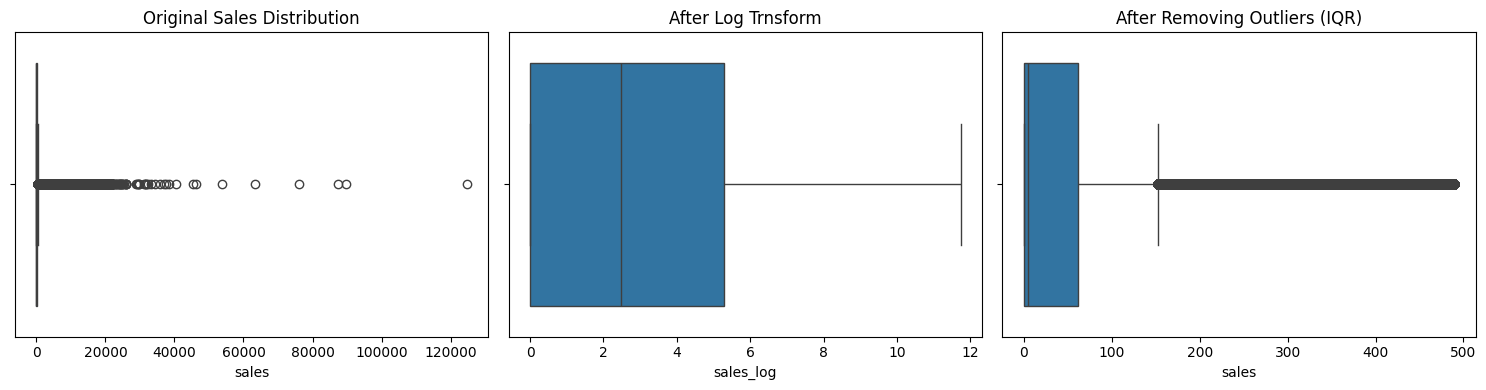

Number of records before removing outliers: 3000888
Number of records after removing outliers: 2553783
Number of outliers removed: 447105


In [27]:

# copy of Data
df = train_copy.copy()

# ------------------------------
#  the original Distribution
# ------------------------------

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)   # one row and three column -- this no one
sns.boxplot(x=df['sales'])
plt.title("Original Sales Distribution")
# ------------------------------
# after (Log Transform)
# ------------------------------
df['sales_log']=np.log1p(df['sales'])
plt.subplot(1,3,2)
sns.boxplot(x=df['sales_log'])
plt.title("After Log Trnsform")

# ------------------------------
#  removing the outliers
# ------------------------------
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df['sales'] >= lower) & (df['sales'] <= upper)]

plt.subplot(1,3,3)
sns.boxplot(x=df_no_outliers['sales'])
plt.title("After Removing Outliers (IQR)")

plt.tight_layout()
plt.show()

# ------------------------------
# comparing
# ------------------------------
print("Number of records before removing outliers:", len(df))
print("Number of records after removing outliers:", len(df_no_outliers))
print("Number of outliers removed:", len(df) - len(df_no_outliers))

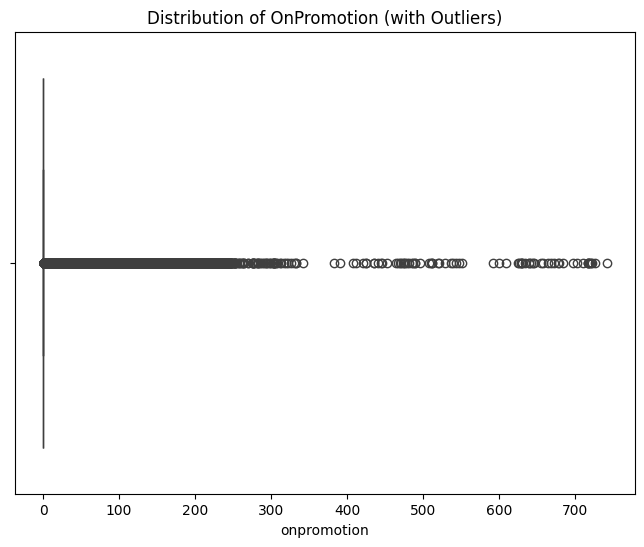

In [28]:

plt.figure(figsize=(8,6))
sns.boxplot(x=train_copy['onpromotion'])
plt.title('Distribution of OnPromotion (with Outliers)')
plt.show()

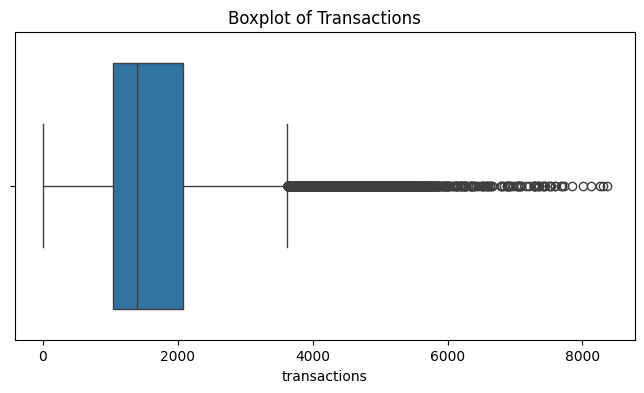

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=transactions["transactions"])
plt.title("Boxplot of Transactions")
plt.xlabel("transactions")
plt.show()


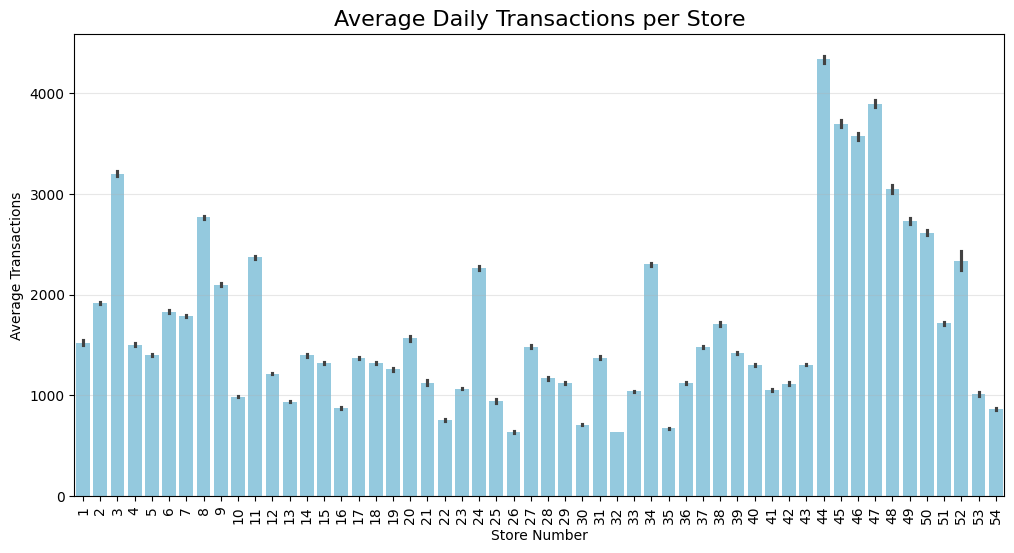

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=transactions, 
    x='store_nbr', 
    y='transactions', 
    color='skyblue'
)
plt.title('Average Daily Transactions per Store', fontsize=16)
plt.xlabel('Store Number')
plt.ylabel('Average Transactions')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.show()


In [16]:
import plotly.express as px

df_grouped = train_copy.copy().groupby('family', as_index=False).agg({
    'sales': 'mean',
    'onpromotion': 'mean'
})

fig_d = px.scatter(
    df_grouped,
    x='family',
    y='sales',
    size='sales',           
    color='onpromotion',     
    size_max=50,
    color_continuous_scale='Plasma',
    title='Comparison of Sales and Promotions by Product Family'
)

fig_d.update_yaxes(title_text='Average Sales')
fig_d.update_coloraxes(colorbar_title='Average Promotions')
fig_d.update_layout(height=900)

fig_d.show(renderer="notebook")


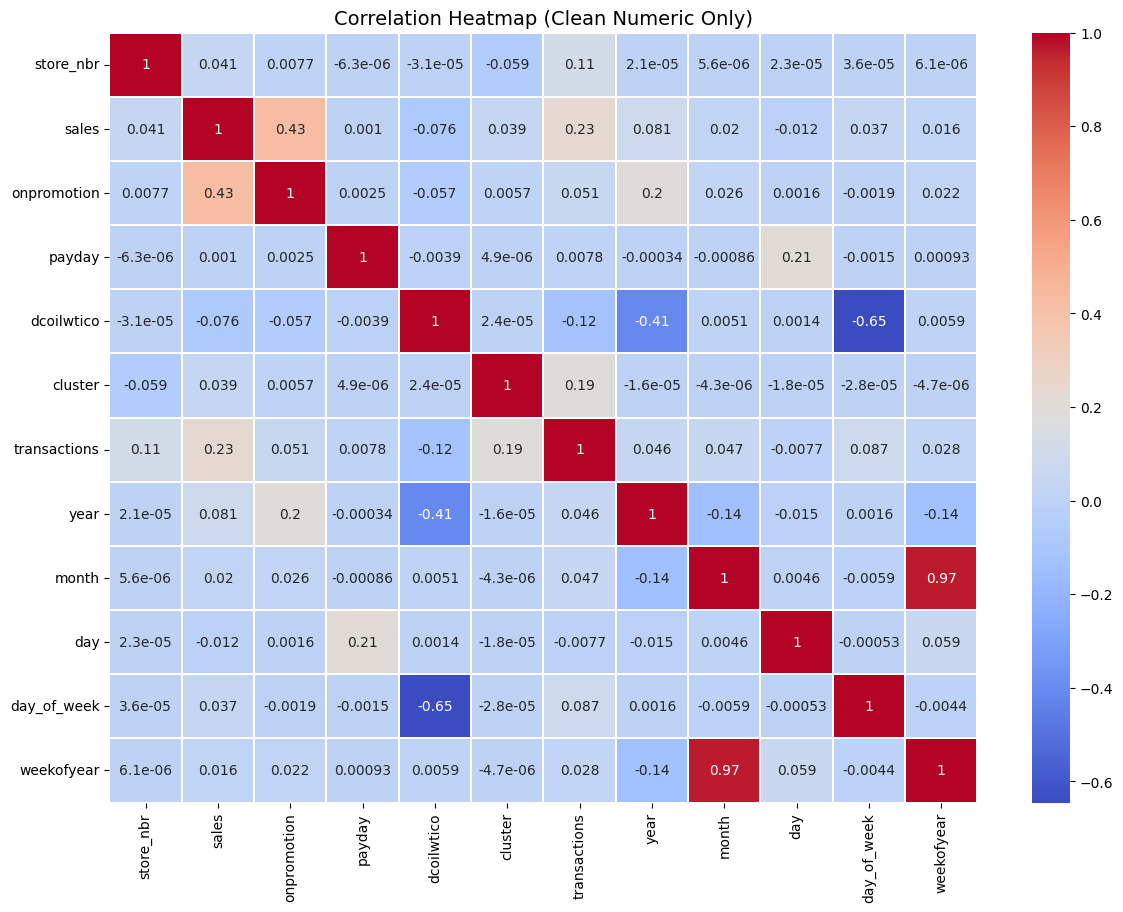

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = train_merged.copy()

df = df.drop(['id'], axis=1)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

if 'year' not in df.columns:
    df['year'] = df['date'].dt.year.astype(int)

if 'month' not in df.columns:
    df['month'] = df['date'].dt.month.astype(int)

if 'day' not in df.columns:
    df['day'] = df['date'].dt.day.astype(int)

if 'day_of_week' not in df.columns:
    df['day_of_week'] = df['date'].dt.dayofweek.astype(int)

if 'weekofyear' not in df.columns:
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)

# ===============================
#Correlation Heatmap(Clean Version)
# ===============================


numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()


numeric_df = numeric_df.dropna(axis=1, thresh=int(0.5 * len(numeric_df)))


numeric_df = numeric_df.fillna(0)

# 4) حساب الارتباط
corr_matrix = numeric_df.corr()

# 5) رسم الخريطة الحرارية
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title("Correlation Heatmap (Clean Numeric Only)", fontsize=14)
plt.show()




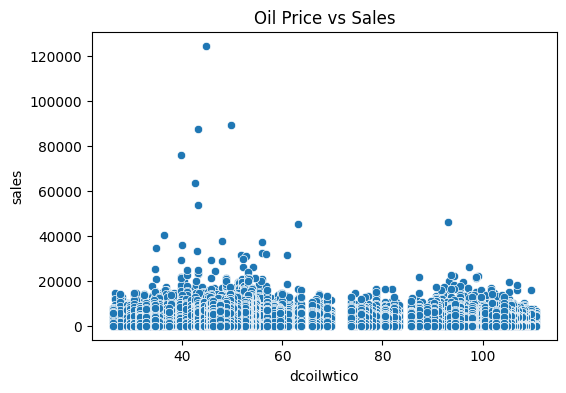

📌 Correlation (Oil vs Sales): -0.0788721452819106


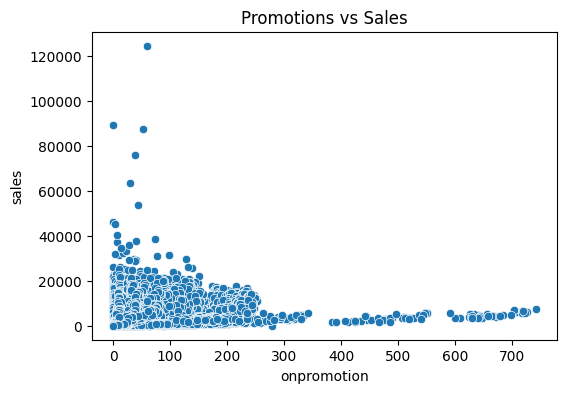

📌 Correlation (Promotions vs Sales): 0.4275047660198849


In [24]:
# ===============================
#  5) Oil vs Sales correlation
# ===============================
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='dcoilwtico', y='sales')
plt.title("Oil Price vs Sales")
plt.show()

corr_oil = df[['dcoilwtico', 'sales']].corr().iloc[0, 1]
print(f"📌 Correlation (Oil vs Sales): {corr_oil}")

# ===============================
#  6) Promotions vs Sales correlation
# ===============================
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='onpromotion', y='sales')
plt.title("Promotions vs Sales")
plt.show()

corr_promo = df[['onpromotion', 'sales']].corr().iloc[0, 1]
print(f"📌 Correlation (Promotions vs Sales): {corr_promo}")



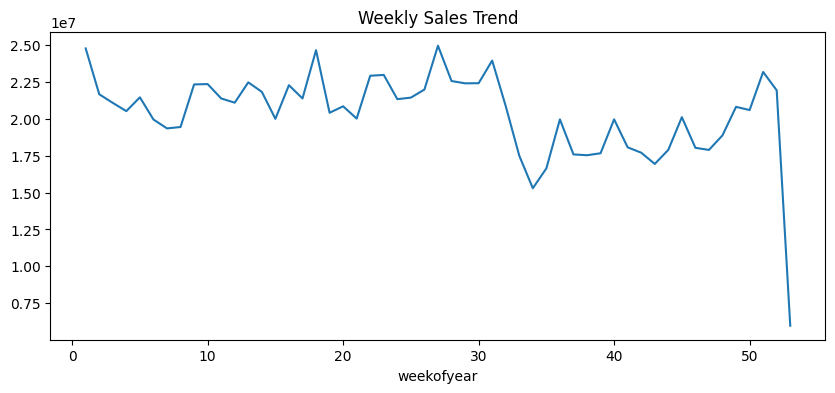

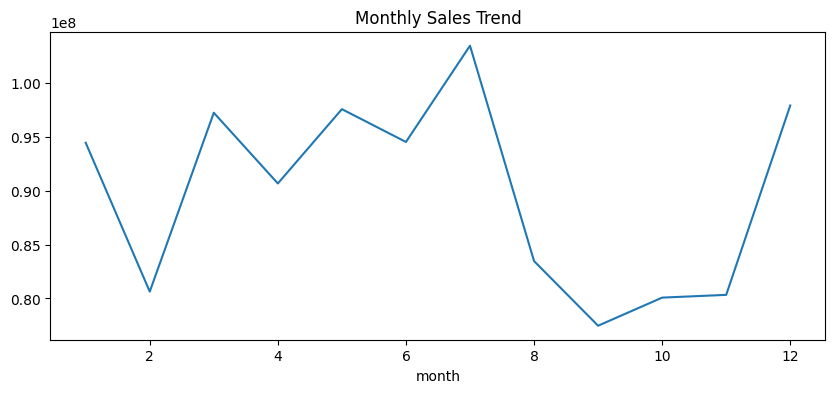


✅ Full EDA Completed Successfully!


In [26]:

# ===============================
# 8) Weekly sales trend
# ===============================
weekly_sales = df.groupby('weekofyear')['sales'].sum()

plt.figure(figsize=(10, 4))
weekly_sales.plot()
plt.title("Weekly Sales Trend")
plt.show()

# ===============================
#  9) Monthly sales trend
# ===============================
monthly_sales = df.groupby('month')['sales'].sum()

plt.figure(figsize=(10, 4))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()

print("\n✅ Full EDA Completed Successfully!")

### Feature Engineering

In [18]:
# ----------------------------------------------
# fill the holiday and the oil
# ----------------------------------------------
holiday_cols = ['national_holiday', 'regional_holiday', 'local_holiday']
oil_col = 'dcoilwtico'

# ----------------------------------------------
# 1) Fill missing Oil Prices (train + test)
#    we used forward fill and  backward fill
# ----------------------------------------------
for df in [train_merged, test_merged]:
    if oil_col in df.columns:
        df[oil_col] = df[oil_col].ffill().bfill()

# ----------------------------------------------
#  2) Fill Holiday Flags (train + test)
#  
# ----------------------------------------------
for df in [train_merged, test_merged]:
    for col in holiday_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)


In [19]:
# 2) Time-based Feature Engineering
# ----------------------------------------------
for df in [train_merged, test_merged]:
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofweek'] = df['date'].dt.dayofweek
    df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
    df['week'] = df['date'].dt.isocalendar().week.astype(int)

In [20]:
# --------------------------
# 1) copy of  train and test
# --------------------------
train_fe = train_merged.copy()
test_fe = test_merged.copy()
test_fe['sales'] = np.nan
test_fe['log_sales'] = np.nan

# --------merge ------------------
full_df = pd.concat([train_fe, test_fe], axis=0, ignore_index=True)
# --------------------------
# 3) sort
# --------------------------
full_df = full_df.sort_values(['store_nbr', 'family', 'date']).reset_index(drop=True)
# --------------------------
# 4)  LOG SALES for train
# --------------------------
full_df.loc[full_df['sales'].notna(), 'log_sales'] = np.log1p(full_df.loc[full_df['sales'].notna(), 'sales'])
# --------------------------
# 5) LAGS
# --------------------------
selected_lags =[1, 7, 14, 21, 28]
for lag in selected_lags:
    full_df[f"log_sales_lag_{lag}"] = (
        full_df
        .groupby(['store_nbr', 'family'])['log_sales']
        .shift(lag)
    )
# --------------------------
# 6) ROLLING
# --------------------------
windows = [7, 14]
for w in windows:
    full_df[f"log_sales_roll_mean_{w}"] = (
        full_df
        .groupby(['store_nbr','family'])['log_sales']
        .transform(lambda x: x.shift(1).rolling(w, min_periods=1).mean())
    )
    full_df[f"log_sales_roll_std_{w}"] = (
        full_df
        .groupby(['store_nbr','family'])['log_sales']
        .transform(lambda x: x.shift(1).rolling(w, min_periods=1).std())
    )

lag_roll_cols = [col for col in full_df.columns if ('lag_' in col or 'roll_' in col)]
full_df[lag_roll_cols] = full_df[lag_roll_cols].fillna(0)

# --------------------------
# 7) seperate test and train
# --------------------------
train_final = full_df[full_df['sales'].notna()].copy()
test_final = full_df[full_df['sales'].isna()].copy()


test_final = test_final.drop(['sales', 'log_sales'], axis=1, errors='ignore')

=== train_final ===

number of feature will solved: 20

أقوى 20 ميزة بالـ Correlation مع log_sales:
log_sales_roll_mean_7     0.976891
log_sales_roll_mean_14    0.974260
log_sales_lag_1           0.966959
log_sales_lag_7           0.963942
log_sales_lag_14          0.951250
log_sales_lag_21          0.938687
log_sales_lag_28          0.926842
onpromotion               0.328890
transactions              0.173195
dcoilwtico                0.172373
log_sales_roll_std_14     0.172362
log_sales_roll_std_7      0.165242
cluster                   0.037388
is_weekend                0.033400
week                      0.028269
national_holiday          0.014832
store_nbr                 0.009847
local_holiday             0.003783
payday                    0.002324
regional_holiday          0.002190
dtype: float64


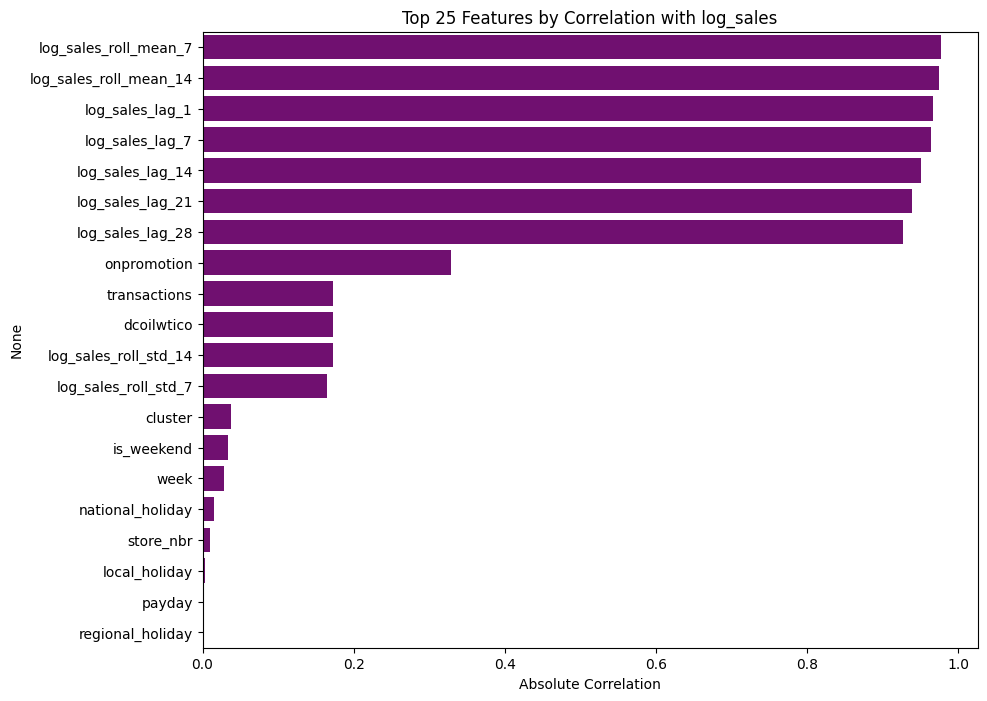


 XGBoost features ...
log_sales_roll_mean_7     0.611778
log_sales_roll_mean_14    0.261937
log_sales_lag_1           0.064972
log_sales_lag_7           0.029098
log_sales_lag_14          0.009432
is_weekend                0.003318
transactions              0.003150
log_sales_roll_std_7      0.003037
log_sales_lag_21          0.003008
log_sales_lag_28          0.002525
log_sales_roll_std_14     0.002044
onpromotion               0.001670
national_holiday          0.001001
week                      0.000996
dcoilwtico                0.000940
payday                    0.000311
store_nbr                 0.000305
cluster                   0.000209
local_holiday             0.000186
regional_holiday          0.000081
dtype: float32


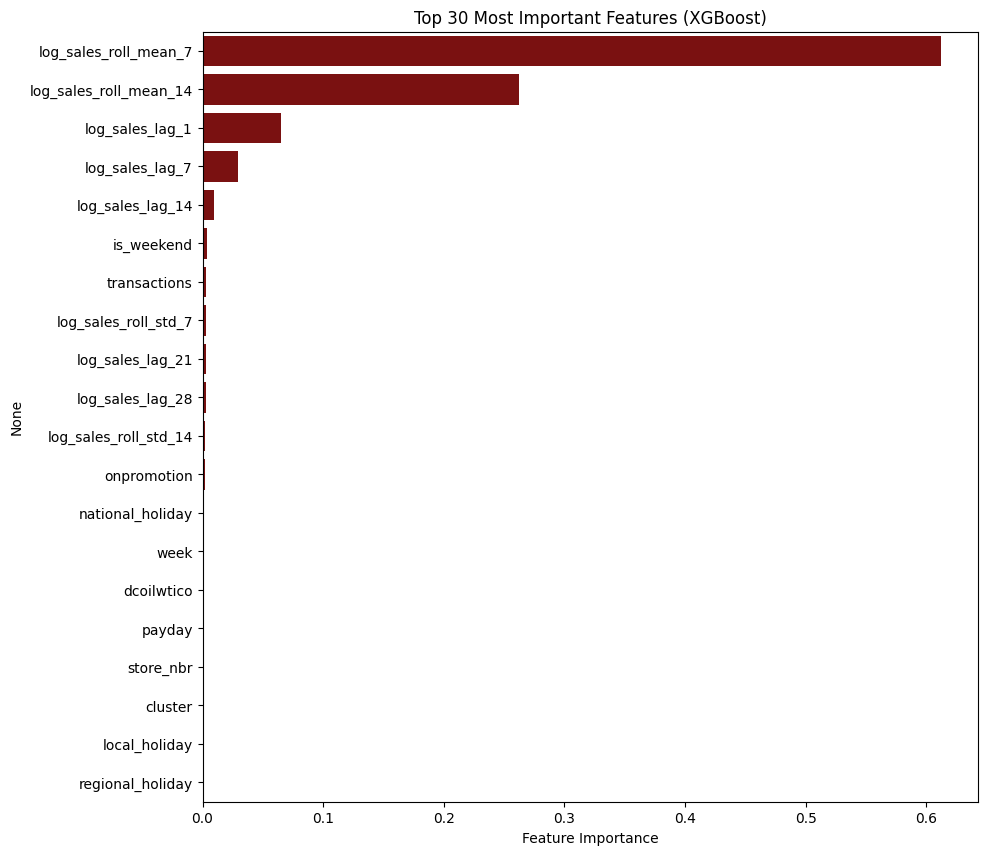

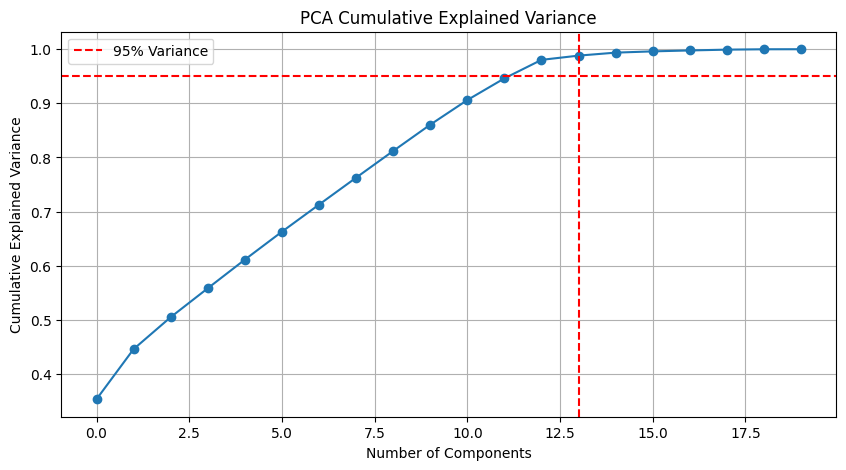

the number of components needed for 95% variance: 13


In [21]:
# =============================================
#  Feature Engineering 
# =============================================
print("=== train_final ===\n")

df = train_final.copy()

# إنشاء log_sales
df['log_sales'] = np.log1p(df['sales'])

# اختيار الأعمدة الرقمية فقط
num_df = df.select_dtypes(include=['float64', 'int64']).copy()

# حذف الأعمدة غير المطلوبة
X = num_df.drop(columns=['sales', 'log_sales', 'id'], errors='ignore')
y = df['log_sales']

print(f"number of feature will solved: {X.shape[1]}")

# ====================================================
# 1) Correlation with Target 
# ====================================================
corr = X.corrwith(y).abs().sort_values(ascending=False)

print("\nأقوى 20 ميزة بالـ Correlation مع log_sales:")
print(corr.head(20))

plt.figure(figsize=(10, 8))


sns.barplot(
    x=corr.head(25).values,
    y=corr.head(25).index,
    color="purple"
)

plt.title("Top 25 Features by Correlation with log_sales")
plt.xlabel("Absolute Correlation")
plt.show()

# ====================================================
# 2) XGBoost Feature Importance 
# ====================================================
print("\n XGBoost features ...")

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist'
)

model.fit(X, y)

importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

print(importance.head(20))

plt.figure(figsize=(10, 10))

sns.barplot(
    x=importance.head(30).values,
    y=importance.head(30).index,
    color="darkred"
)

plt.title("Top 30 Most Important Features (XGBoost)")
plt.xlabel("Feature Importance")
plt.show()

# ====================================================
# 3) PCA 
# ====================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.fillna(0))

pca = PCA()
pca.fit(X_scaled)

explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(explained, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.axvline(x=np.argmax(explained >= 0.95) + 1, color='r', linestyle='--')
plt.title("PCA Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid()
plt.show()


print(f"the number of components needed for 95% variance: {np.argmax(explained >= 0.95) + 1}")


In [22]:
# =====================================================
# Full data inspection after feature engineering (train_final/test_final)
# =====================================================

print("=== Full Inspection of Final Data ===\n")

# 1) Shapes
print(f"train_final shape : {train_final.shape}")
print(f"test_final  shape : {test_final.shape}\n")

# 2) Column matching
train_cols = set(train_final.columns)
test_cols  = set(test_final.columns)

print(f"Number of columns in train: {len(train_cols)}")
print(f"Number of columns in test : {len(test_cols)}")
print(f"Columns match? → {train_cols == test_cols}\n")

if train_cols != test_cols:
    print("Missing columns in test:", train_cols - test_cols)
    print("Extra columns in test  :", test_cols - train_cols)

# 3) Lag / Rolling features
lag_features = [c for c in train_final.columns if 'lag_' in c or 'roll_' in c]
print(f"\nNumber of Lag/Rolling features: {len(lag_features)}")

print("First 10:")
print(sorted(lag_features)[:10])

print("Last 10:")
print(sorted(lag_features)[-10:])

# 4) NaN counts in lag/rolling
print(f"\nNaN in lag/roll (train): {train_final[lag_features].isna().sum().sum()}")
print(f"NaN in lag/roll (test) : {test_final[lag_features].isna().sum().sum()}\n")

# 5) Holiday columns
holiday_cols = ['national_holiday', 'regional_holiday', 'local_holiday']
print("Holiday column overview in train_final:")
for col in holiday_cols:
    print(f"  {col} → dtype: {train_final[col].dtype}, unique: {train_final[col].unique()[:5]}")

# 6) Oil price column
print(f"\ndcoilwtico NaN in train: {train_final['dcoilwtico'].isna().sum()}")
print(f"dcoilwtico NaN in test : {test_final['dcoilwtico'].isna().sum()}")

# 7) Transactions
print(f"\ntransactions NaN in test: {test_final['transactions'].isna().sum()}")

# 8) Date range check
print(f"\nLast date in train: {train_final['date'].max()}")
print(f"First date in test: {test_final['date'].min()}")

# 9) Sample preview from test_final
sample_cols = [
    'date',
    'store_nbr',
    'family',
    'log_sales_lag_1',
    'log_sales_lag_7',
    'log_sales_roll_mean_28',
    'transactions'
]

existing_cols = [c for c in sample_cols if c in test_final.columns]

print("\nSample rows from test_final:")
display(test_final.sample(5, random_state=42)[existing_cols].round(2))

print("Check complete.")


=== Full Inspection of Final Data ===

train_final shape : (3008280, 32)
test_final  shape : (28512, 30)

Number of columns in train: 32
Number of columns in test : 30
Columns match? → False

Missing columns in test: {'sales', 'log_sales'}
Extra columns in test  : set()

Number of Lag/Rolling features: 9
First 10:
['log_sales_lag_1', 'log_sales_lag_14', 'log_sales_lag_21', 'log_sales_lag_28', 'log_sales_lag_7', 'log_sales_roll_mean_14', 'log_sales_roll_mean_7', 'log_sales_roll_std_14', 'log_sales_roll_std_7']
Last 10:
['log_sales_lag_1', 'log_sales_lag_14', 'log_sales_lag_21', 'log_sales_lag_28', 'log_sales_lag_7', 'log_sales_roll_mean_14', 'log_sales_roll_mean_7', 'log_sales_roll_std_14', 'log_sales_roll_std_7']

NaN in lag/roll (train): 0
NaN in lag/roll (test) : 0

Holiday column overview in train_final:
  national_holiday → dtype: float64, unique: [1. 0.]
  regional_holiday → dtype: float64, unique: [0. 1.]
  local_holiday → dtype: float64, unique: [0. 1.]

dcoilwtico NaN in train:

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


date  store_nbr                      family  log_sales_lag_1  \
1347895 2017-08-31         24  SCHOOL AND OFFICE SUPPLIES              0.0   
1814957 2017-08-31         33                       DAIRY              0.0   
243665  2017-08-25          5                        EGGS              0.0   
361234  2017-08-18          7                  GROCERY II              0.0   
1114415 2017-08-31         20                PET SUPPLIES              0.0   

         log_sales_lag_7  transactions  
1347895             0.00           NaN  
1814957             0.00           NaN  
243665              0.00           NaN  
361234              3.83           NaN  
1114415             0.00           NaN

Check complete.


In [23]:
# تحويل date لـ datetime لو مش متحولة
train_final['date'] = pd.to_datetime(train_final['date'])

# نحدد آخر يوم في train
last_date = train_final['date'].max()

# validation = آخر 30 يوم قبل test
val_start = last_date - pd.Timedelta(days=30)

# تقسيم البيانات
valid_df = train_final[train_final['date'] >= val_start].copy()
train_df = train_final[train_final['date'] <  val_start].copy()

print("Train shape =", train_df.shape)
print("Validation shape =", valid_df.shape)
print("Validation date range:", valid_df['date'].min(), "→", valid_df['date'].max())


Train shape = (2953038, 32)
Validation shape = (55242, 32)
Validation date range: 2017-07-16 00:00:00 → 2017-08-15 00:00:00


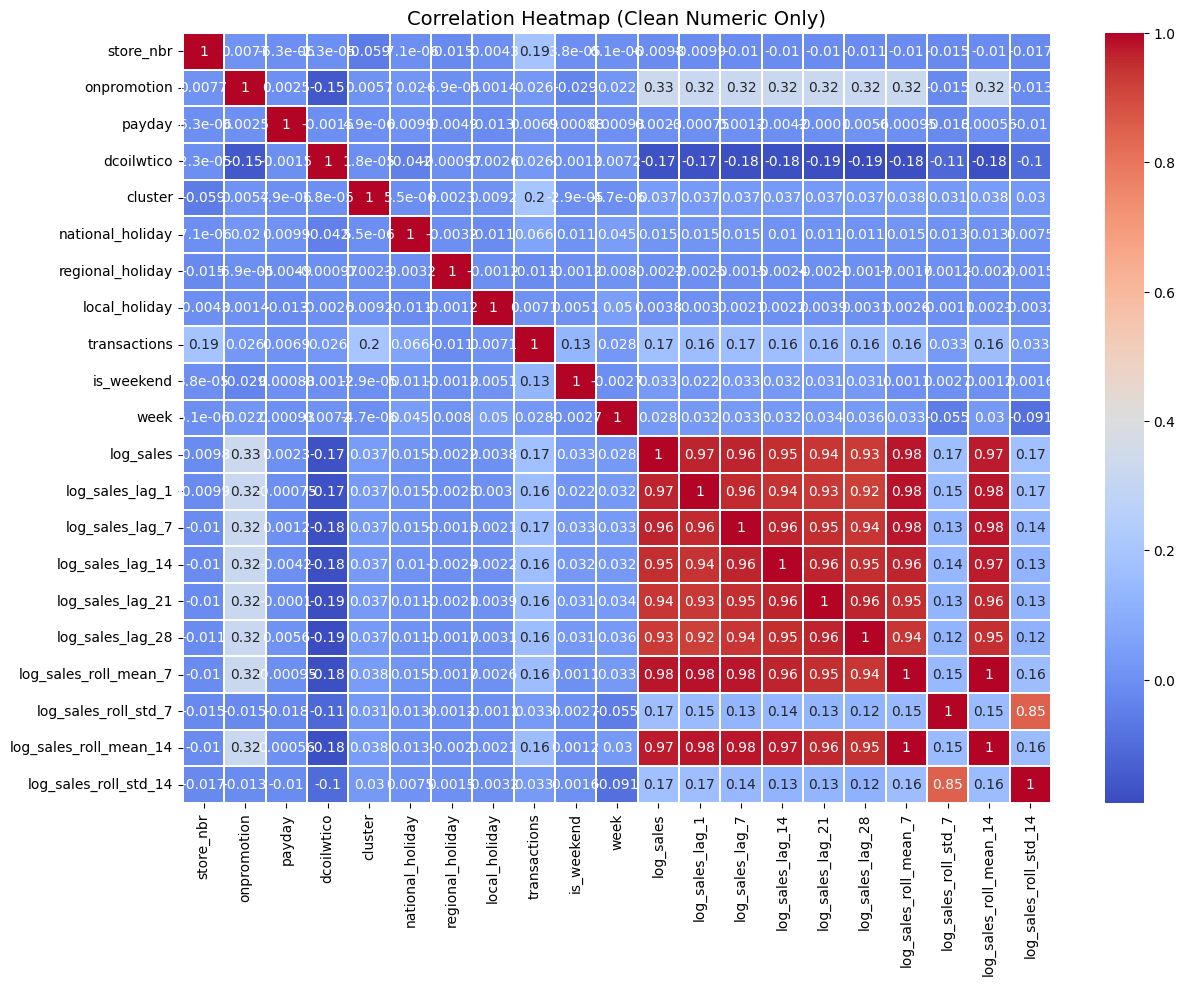

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ===============================
#  work in different copy
# ===============================
df =train_final.copy()

df = df.drop(['id','sales'], axis=1)
df['date'] = pd.to_datetime(df['date'], errors='coerce')


#Correlation Heatmap للأعمدة الرقمية (Clean Version)
# ===============================

# 1) choosing num column
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()



corr_matrix = numeric_df.corr()

# 5) رسم الخريطة الحرارية
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title("Correlation Heatmap (Clean Numeric Only)", fontsize=14)
plt.show()



 Forecasting Model Development & Optimization

In [27]:
train_cat = train_df.copy()
valid_cat = valid_df.copy()
train_cat.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'payday',
       'dcoilwtico', 'city', 'state', 'type', 'cluster', 'national_holiday',
       'regional_holiday', 'local_holiday', 'transactions', 'day', 'month',
       'year', 'dayofweek', 'is_weekend', 'week', 'log_sales',
       'log_sales_lag_1', 'log_sales_lag_7', 'log_sales_lag_14',
       'log_sales_lag_21', 'log_sales_lag_28', 'log_sales_roll_mean_7',
       'log_sales_roll_std_7', 'log_sales_roll_mean_14',
       'log_sales_roll_std_14'],
      dtype='object')

In [29]:
from catboost import Pool
import numpy as np

# ---------------------------------------
# 1) Target column (log_sales)
# ---------------------------------------
target_col = 'log_sales'
if target_col not in train_cat.columns:
    raise ValueError("log_sales is not found in train_cat — make sure it exists")

# ---------------------------------------
# 2) Columns to remove
# ---------------------------------------
drop_cols = [
    'national_holiday',
    'regional_holiday',
    'local_holiday',
    'payday',
    'week',
    'id',
    'sales',
    'date'
]

# Drop columns from both train and validation datasets
train_cat = train_cat.drop(columns=drop_cols, errors='ignore')
valid_cat = valid_cat.drop(columns=drop_cols, errors='ignore')

# ---------------------------------------
# 3) Select X columns (all except drop_cols + target)
# ---------------------------------------
X_cols = [c for c in train_cat.columns if c not in drop_cols + [target_col]]

print("Number of X features after dropping:", len(X_cols))

# ---------------------------------------
# 4) Split into X and y
# ---------------------------------------
X_train = train_cat[X_cols].copy()
y_train = train_cat[target_col].copy()

X_valid = valid_cat[X_cols].copy()
y_valid = valid_cat[target_col].copy()

# ---------------------------------------
# 5) Categorical feature names
# ---------------------------------------
cat_features = ['store_nbr', 'family', 'city', 'state', 'type']

# Keep only those that exist in X_train
cat_features = [c for c in cat_features if c in X_train.columns]

print("Categorical features used:", cat_features)

# ---------------------------------------
# 6) Create CatBoost Pools
# ---------------------------------------
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
valid_pool = Pool(data=X_valid, label=y_valid, cat_features=cat_features)

print("✅ Pools created successfully — X_train:", X_train.shape, " X_valid:", X_valid.shape)


Number of X features after dropping: 23
Categorical features used: ['store_nbr', 'family', 'city', 'state', 'type']
✅ Pools created successfully — X_train: (2953038, 23)  X_valid: (55242, 23)


In [30]:
from catboost import CatBoostRegressor

cat_model_fast = CatBoostRegressor(
    iterations=800,          # سريع
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    random_seed=42,
    verbose=200
)

cat_model_fast.fit(
    train_pool,
    eval_set=valid_pool,
    use_best_model=True
)


0:	learn: 2.4454029	test: 2.3775026	best: 2.3775026 (0)	total: 3.85s	remaining: 51m 16s
200:	learn: 0.3958947	test: 0.3918417	best: 0.3918417 (200)	total: 6m 2s	remaining: 17m 58s
400:	learn: 0.3808548	test: 0.3845945	best: 0.3845945 (400)	total: 11m 38s	remaining: 11m 34s
600:	learn: 0.3734686	test: 0.3814102	best: 0.3814102 (600)	total: 17m 20s	remaining: 5m 44s
799:	learn: 0.3689758	test: 0.3795719	best: 0.3795719 (799)	total: 22m 57s	remaining: 0us

bestTest = 0.3795718818
bestIteration = 799



In [31]:
from sklearn.metrics import mean_squared_log_error

# 1) Predict on the validation set (log scale)
# ===========================================
cat_pred_log = cat_model_fast.predict(valid_pool)

# 2) Convert log predictions to real sales values
# ===============================================
cat_pred_real = np.expm1(cat_pred_log)
y_valid_real  = np.expm1(y_valid)

# 3) Fix any negative prediction values
# =====================================
cat_pred_real = np.maximum(cat_pred_real, 0)

# 4) Calculate the actual RMSLE
# ==============================
cat_rmsle = np.sqrt(mean_squared_log_error(y_valid_real, cat_pred_real))

print(f"CatBoost Validation RMSLE = {cat_rmsle:.6f}")


CatBoost Validation RMSLE = 0.379570


In [32]:
# =====================================================
# 1) Copy training and validation data for XGBoost
# =====================================================
train_xgb = train_df.copy()
valid_xgb = valid_df.copy()

# Drop unused columns
drop_cols = [
    'national_holiday',
    'regional_holiday',
    'local_holiday',
    'payday',
    'week',
    'id',
    'sales',
    'date'
]

train_xgb = train_xgb.drop(columns=drop_cols, errors='ignore')
valid_xgb = valid_xgb.drop(columns=drop_cols, errors='ignore')

# =====================================================
# 2) Handle categorical features
# =====================================================
cat_features = ['store_nbr', 'family', 'city', 'state', 'type']

for col in cat_features:
    if col in train_xgb.columns:
        train_xgb[col] = train_xgb[col].astype('category')
        valid_xgb[col] = valid_xgb[col].astype('category')
        valid_xgb[col] = valid_xgb[col].cat.set_categories(
            train_xgb[col].cat.categories
        )

# =====================================================
# 3) Prepare X and y
# =====================================================
y_train_xgb = train_xgb['log_sales']
y_valid_xgb = valid_xgb['log_sales']

X_train_xgb = train_xgb.drop(columns=['log_sales'])
X_valid_xgb = valid_xgb.drop(columns=['log_sales'])



In [33]:

xgb_model = xgb.XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=7,
    min_child_weight=5,
    subsample=0.85,
    colsample_bytree=0.75,

    reg_alpha=0.0,
    reg_lambda=1.0,

    tree_method="hist",
    device="cpu",
    enable_categorical=True,
    early_stopping_rounds=150,

    random_state=42,
    eval_metric="rmse",
    n_jobs=-1
)

print("\nTraining XGBoost...")

xgb_model.fit(
    X_train_xgb,
    y_train_xgb,
    eval_set=[(X_valid_xgb, y_valid_xgb)],
    verbose=200
)

# =====================================================
# 5) Predict on validation (log scale)
# =====================================================
xgb_pred_log = xgb_model.predict(X_valid_xgb)

# =====================================================
# 6) Convert log sales back to actual sales
# =====================================================
xgb_pred_real = np.maximum(np.expm1(xgb_pred_log), 0)

y_valid_xgb_real = np.expm1(y_valid_xgb)

# RMSLE
xgb_rmsle = np.sqrt(mean_squared_log_error(y_valid_xgb_real, xgb_pred_real))

print(f"\nXGBoost Validation RMSLE = {xgb_rmsle:.6f}")
print(f"Best iteration = {xgb_model.best_iteration}")



Training XGBoost...
[0]	validation_0-rmse:2.55114
[200]	validation_0-rmse:0.38158
[400]	validation_0-rmse:0.37744
[600]	validation_0-rmse:0.37534
[800]	validation_0-rmse:0.37349
[1000]	validation_0-rmse:0.37231
[1200]	validation_0-rmse:0.37130
[1400]	validation_0-rmse:0.37056
[1499]	validation_0-rmse:0.37027

XGBoost Validation RMSLE = 0.370262
Best iteration = 1499


In [36]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_squared_error

# ==============================
# Clean LightGBM pipeline
# ==============================

# 0) Use clean copies from original train_df / valid_df (NOT the XGBoost-transformed copies)
train_lgb = train_df.copy()
valid_lgb = valid_df.copy()

# 0.1) Ensure date is datetime (safe-guard)
train_lgb['date'] = pd.to_datetime(train_lgb['date'])
valid_lgb['date'] = pd.to_datetime(valid_lgb['date'])

# 1) Define categorical columns by name (we'll convert them to 'category' dtype)
cat_features = ['store_nbr', 'family', 'city', 'state', 'type']
cat_features = [c for c in cat_features if c in train_lgb.columns]

# 2) Convert to category dtype and ensure same categories in valid
for c in cat_features:
    train_lgb[c] = train_lgb[c].astype('category')
    # for valid: cast then set same categories as train to avoid unseen-category mismatch
    if c in valid_lgb.columns:
        valid_lgb[c] = valid_lgb[c].astype('category')
        valid_lgb[c] = valid_lgb[c].cat.set_categories(train_lgb[c].cat.categories)

# 3) Drop only the columns we don't want as features (keep log_sales for the target)
drop_cols = ['id', 'sales', 'date']
feature_cols = [c for c in train_lgb.columns if c not in drop_cols and c != 'log_sales']

# quick checks
print("Num features for LightGBM:", len(feature_cols))
print("Sample feature columns:", feature_cols[:12])
print("Categorical features used:", cat_features)

# 4) Create X / y
X_train_lgb = train_lgb[feature_cols]
y_train_lgb = train_lgb['log_sales']

X_valid_lgb = valid_lgb[feature_cols]
y_valid_lgb = valid_lgb['log_sales']

print("X_train_lgb shape:", X_train_lgb.shape)
print("X_valid_lgb shape:", X_valid_lgb.shape)



Num features for LightGBM: 28
Sample feature columns: ['store_nbr', 'family', 'onpromotion', 'payday', 'dcoilwtico', 'city', 'state', 'type', 'cluster', 'national_holiday', 'regional_holiday', 'local_holiday']
Categorical features used: ['store_nbr', 'family', 'city', 'state', 'type']
X_train_lgb shape: (2953038, 28)
X_valid_lgb shape: (55242, 28)


In [37]:
# 5) Build lgb.Dataset using column NAMES for categorical_feature (safer)
train_data = lgb.Dataset(X_train_lgb, label=y_train_lgb, categorical_feature=cat_features, free_raw_data=False)
valid_data = lgb.Dataset(X_valid_lgb, label=y_valid_lgb, categorical_feature=cat_features, reference=train_data, free_raw_data=False)

# 6) Params (you can tune later)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 64,
    'max_depth': -1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf': 50,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'verbosity': -1,
    'seed': 42
}

# 7) Callbacks
callbacks = [
    lgb.early_stopping(stopping_rounds=100),
    lgb.log_evaluation(period=200)
]

# 8) Train
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[valid_data],
    num_boost_round=2000,
    callbacks=callbacks
)

print("LightGBM training done! Best iteration:", lgb_model.best_iteration)

# ================================
# 9) Predict using best iteration
# ================================

# تنبؤ اللوج
preds_lgb_log = lgb_model.predict(X_valid_lgb, num_iteration=lgb_model.best_iteration)

# تحويل التنبؤ من log → real
preds_lgb_real = np.expm1(preds_lgb_log)

# تحويل y_valid من log → real
y_valid_lgb_real = np.expm1(y_valid_lgb)

# حساب RMSE  
rmse_lgb_real = mean_squared_error(y_valid_lgb_real, preds_lgb_real, squared=False)

print("Validation RMSE (LGBM) on REAL sales:", rmse_lgb_real)

Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.380847
[400]	valid_0's rmse: 0.376052
[600]	valid_0's rmse: 0.373795
[800]	valid_0's rmse: 0.372365
[1000]	valid_0's rmse: 0.37143
[1200]	valid_0's rmse: 0.370648
[1400]	valid_0's rmse: 0.370039
[1600]	valid_0's rmse: 0.369563
[1800]	valid_0's rmse: 0.369213
[2000]	valid_0's rmse: 0.368837
Did not meet early stopping. Best iteration is:
[2000]	valid_0's rmse: 0.368837
LightGBM training done! Best iteration: 2000
Validation RMSE (LGBM) on REAL sales: 182.20589620707628


In [38]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Predict LightGBM  validation iteration
lgb_pred_log = lgb_model.predict(X_valid_lgb, num_iteration=lgb_model.best_iteration)


lgb_pred_real = np.maximum(np.expm1(lgb_pred_log), 0)
y_valid_real  = np.expm1(y_valid_lgb)

# rmsle
lgb_rmsle = np.sqrt(mean_squared_log_error(y_valid_real, lgb_pred_real))
print(f"LightGBM Validation RMSLE = {lgb_rmsle:.6f}")


LightGBM Validation RMSLE = 0.368831


In [39]:

# ===============================
# 0) Linear Regression 
# ===============================
cat_cols = ['store_nbr', 'cluster']

for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    valid_df[col] = le.transform(valid_df[col])
    test_final[col] = le.transform(test_final[col])

# ===============================
# 1) Prepare data
# ===============================
features = ['store_nbr','cluster', 'onpromotion','dcoilwtico','transactions']

X_train = train_df[features].copy()
y_train = train_df['log_sales'].copy()

X_valid = valid_df[features].copy()
y_valid = valid_df['log_sales'].copy()


X_train = X_train.fillna(0)
X_valid = X_valid.fillna(0)

# ===============================
# 2) Train model
# ===============================
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [40]:
# ===============================
# 2) Train Linear Regression
# ===============================
lr = LinearRegression()
lr.fit(X_train, y_train)

# ===============================
# 3) Predict validation
# ===============================
y_pred_log = lr.predict(X_valid)

# فك اللوج
y_pred = np.maximum(np.expm1(y_pred_log), 0)
y_valid_real = np.expm1(y_valid)

# ===============================
# 4) حساب RMSLE
# ===============================
rmsle = np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_valid_real))**2))
print("Linear Regression RMSLE:", rmsle)
r2 = r2_score(y_valid_real, y_pred)
print("Linear Regression R2 Score:", r2)

Linear Regression RMSLE: 2.1414178350725277
Linear Regression R2 Score: -3.9586686568985985e+20


In [41]:


# ===============================
# 0) Label Encoding
# ===============================
cat_cols = ['store_nbr', 'cluster']

for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    valid_df[col] = le.transform(valid_df[col])
    test_final[col] = le.transform(test_final[col])

# ===============================
# 1) Prepare features
# ===============================
features = ['store_nbr', 'onpromotion',
            'dcoilwtico', 'cluster', 'transactions',
            'log_sales_lag_1', 'log_sales_lag_7', 'log_sales_lag_14',
            'log_sales_lag_21', 'log_sales_lag_28',
            'log_sales_roll_mean_7', 'log_sales_roll_std_7',
            'log_sales_roll_mean_14', 'log_sales_roll_std_14']

X_train = train_df[features].fillna(0)
y_train = train_df['log_sales']

X_valid = valid_df[features].fillna(0)
y_valid = valid_df['log_sales']

# ===============================
# 1.5) Scaling (VERY IMPORTANT)
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# ===============================
# 2) Train Fast Linear Model
# ===============================
sgd = SGDRegressor(
    max_iter=3000,
    eta0=0.01,
    learning_rate="invscaling",
    penalty='l2'
)

sgd.fit(X_train_scaled, y_train)



SGDRegressor(max_iter=3000)

In [42]:
# ===============================
# 3) Predict
# ===============================
y_pred_log = sgd.predict(X_valid_scaled)

# Convert back from log-space
y_pred = np.maximum(np.expm1(y_pred_log), 0)
y_valid_real = np.expm1(y_valid)

# ===============================
# 4) RMSLE
# ===============================
rmsle = np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_valid_real))**2))
print("Fast Linear Model (SGD) RMSLE:", rmsle)
r2 = r2_score(y_valid_real, y_pred)
print("Linear Regression R2 Score:", r2)

Fast Linear Model (SGD) RMSLE: 0.4179042688259682
Linear Regression R2 Score: 0.9507943434604016
